## 登峰杯分类模型测试(2)
为了符合实际，要把二分类模型改到四分类模型。由于类别间有较强连续性，不必向量化，改动不大。
- 0 : 未到达终点，出局(积分、金币耗尽)
- 0.33 : 第三名
- 0.67 : 第二名
- 1 : 第一名

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import Callback, History
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = np.random.random((1000, 5))
label = np.random.randint(4, size=(1000, 1))
label = label.astype(float)
for i in range(0, len(label)):
    label[i][0] = label[i][0] / 3.0

In [11]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 标准化
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
def displayHis(history):
    total_points = 1000
    losses = history.history['loss']
    acc = history.history['acc']
    x = range(0, total_points)
    fac = np.floor(len(losses) / total_points)
    racc = [ ]
    for i in range(0, len(acc)):
        if i % fac == 0:
            racc.append(acc[i])
    rlosses = [ ]
    for i in range(0, len(losses)):
        if i % fac == 0:
            rlosses.append(losses[i])
    
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(x, racc)
    axarr[0].set_title('Accuracy')
    axarr[1].plot(x, rlosses)
    axarr[1].set_title('Loss')
history = History()

In [12]:
model.fit(data, label, batch_size=32, epochs=5000, verbose=0, callbacks=[history])

0.504


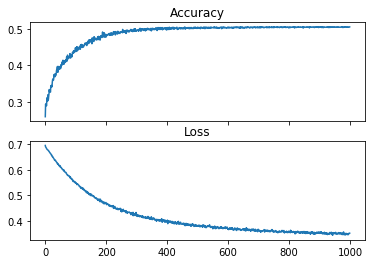

In [13]:
%matplotlib inline
print history.history['acc'][len(history.history['acc'])-1]
displayHis(history)

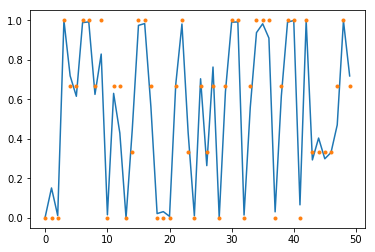

In [15]:
%matplotlib inline
x = np.arange(50)
plt.plot(x, model.predict(data[0:50]))
plt.plot(x, label[0:50], '.')

连续化的效果不好，可能是Accuracy计算方式导致的，数据可视化后可知，分类准确率尚可。